In [399]:
# Import libraries
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt

In [401]:
# Load hotel data from json file (scraped from hotels.com) and do some light preprocessing.

def read_json(filename):
    """
    Reads json file with hotel data and concatenates the result
    into one dataframe.
    """
    with open(filename, "rb") as f:
        data = json.load(f)

    dfs = [pd.DataFrame(item) for item in data]
    return pd.concat(dfs, ignore_index=True)

def split_string_values(df):
    """
    Find values of interest in strings. Extract, and possibly split into new columns.
    """
    df_ = df.copy()
    price = []
    price_sale = []
    star_rating = []
    
    # Extract dollar amounts from string
    df_["price"] = df_.price.str.findall(r"\$\d+")

    
    #df_["star_rating"] = df_.price.str.findall(r"\$\d+")
    
    for row_ in df_.iterrows():
        # Extract price data from `price`column
        row = row_[1]["price"]
        if not row:
            price.append(None)
            price_sale.append(None)
        elif len(row) == 1:
            price.append(int(row[0].lstrip("$")))
            price_sale.append(None)
        elif len(row) == 2:
            price.append(int(row[0].lstrip("$")))
            price_sale.append(int(row[1].lstrip("$")))
            
        # Extract hotel star rating from `star_rating` column
        row = row_[1]["star_rating"]
        star_rating.append(float(row.strip("-star")))
        
        # Extract hotel guest rating from `rating` column
        #row = row_[1]["star_rating"]
        #star_rating.append(float(row.strip("-star")))
        
    df_["price"] = price
    df_["price_sale"] = price_sale
    df_["star_rating"] = star_rating
    return df_

def preprocess(df):
    # Cast date columns as datetime type
    df["checkin"] = pd.to_datetime(df["checkin"])
    df["checkout"] = pd.to_datetime(df["checkout"])
    
    # Price column contains up to 2 dollar values (ordinary price and sale price).
    # Extract the prices and split into two columns
    df = split_string_values(df)
    return df
    
df = read_json('./hotels_vegas.json')
df.head()

,name,address,hotel_details,review_box,rating,n_reviews,price,checkin,checkout,adults,children,star_rating
0,Royal Resort,"99 Convention Center Dr, Las Vegas, NV, 89109,...",3.5-starLas Vegas1.3 miles to City center0.6 m...,3.5-starLas Vegas1.3 miles to City center0.6 m...,7.2 Good,367 reviews,$47The struck out price is based on the proper...,2020-05-05,2020-05-06,2,0,3.5-star
1,Fairfield Inn Las Vegas Convention Center,"3850 Paradise Rd, Las Vegas, NV, 89109, United...",2.5-starLas Vegas1.0 mile to City center0.9 mi...,2.5-starLas Vegas1.0 mile to City center0.9 mi...,8.6 Fabulous,271 reviews,Great Rate*$189The price comparison is based o...,2020-05-05,2020-05-06,2,0,2.5-star
2,Baymont by Wyndham Las Vegas South Strip,"55 E Robindale Road, Las Vegas, NV, 89123, Uni...",2.5-starLas Vegas4.5 miles to City center5.8 m...,2.5-starLas Vegas4.5 miles to City center5.8 m...,6.6 Good,"1,297 reviews",Great Rate*$119The price comparison is based o...,2020-05-05,2020-05-06,2,0,2.5-star
3,Mardi Gras Hotel & Casino,"3500 Paradise Rd, Las Vegas, NV, 89169, United...",3-starLas Vegas1.2 miles to City center0.5 mil...,3-starLas Vegas1.2 miles to City center0.5 mil...,6.8 Good,"2,753 reviews",30% offSpecial DealSpecial deal: save 30%$70Th...,2020-05-05,2020-05-06,2,0,3-star
4,Tuscany Suites & Casino,"255 E Flamingo Rd, Las Vegas, NV, 89169, Unite...",3.5-starLas Vegas0.6 miles to City center1.3 m...,3.5-starLas Vegas0.6 miles to City center1.3 m...,8.8 Fabulous,"9,386 reviews",Fully booked! We’re sold out for your travel d...,2020-05-05,2020-05-06,2,0,3.5-star


In [395]:
df.price.head()

0    $47The struck out price is based on the proper...
1    Great Rate*$189The price comparison is based o...
2    Great Rate*$119The price comparison is based o...
3    30% offSpecial DealSpecial deal: save 30%$70Th...
4    Fully booked! We’re sold out for your travel d...
Name: price, dtype: object

In [402]:
df = preprocess(df)
df.head()

,name,address,hotel_details,review_box,rating,n_reviews,price,checkin,checkout,adults,children,star_rating,price_sale
0,Royal Resort,"99 Convention Center Dr, Las Vegas, NV, 89109,...",3.5-starLas Vegas1.3 miles to City center0.6 m...,3.5-starLas Vegas1.3 miles to City center0.6 m...,7.2 Good,367 reviews,47.0,2020-05-05,2020-05-06,2,0,3.5,42.0
1,Fairfield Inn Las Vegas Convention Center,"3850 Paradise Rd, Las Vegas, NV, 89109, United...",2.5-starLas Vegas1.0 mile to City center0.9 mi...,2.5-starLas Vegas1.0 mile to City center0.9 mi...,8.6 Fabulous,271 reviews,189.0,2020-05-05,2020-05-06,2,0,2.5,99.0
2,Baymont by Wyndham Las Vegas South Strip,"55 E Robindale Road, Las Vegas, NV, 89123, Uni...",2.5-starLas Vegas4.5 miles to City center5.8 m...,2.5-starLas Vegas4.5 miles to City center5.8 m...,6.6 Good,"1,297 reviews",119.0,2020-05-05,2020-05-06,2,0,2.5,79.0
3,Mardi Gras Hotel & Casino,"3500 Paradise Rd, Las Vegas, NV, 89169, United...",3-starLas Vegas1.2 miles to City center0.5 mil...,3-starLas Vegas1.2 miles to City center0.5 mil...,6.8 Good,"2,753 reviews",70.0,2020-05-05,2020-05-06,2,0,3.0,49.0
4,Tuscany Suites & Casino,"255 E Flamingo Rd, Las Vegas, NV, 89169, Unite...",3.5-starLas Vegas0.6 miles to City center1.3 m...,3.5-starLas Vegas0.6 miles to City center1.3 m...,8.8 Fabulous,"9,386 reviews",NaN,2020-05-05,2020-05-06,2,0,3.5,NaN


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39170 entries, 0 to 39169
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           39170 non-null  object        
 1   address        39170 non-null  object        
 2   hotel_details  39170 non-null  object        
 3   review_box     39170 non-null  object        
 4   rating         39170 non-null  object        
 5   n_reviews      39170 non-null  object        
 6   price          36331 non-null  float64       
 7   checkin        39170 non-null  datetime64[ns]
 8   checkout       39170 non-null  datetime64[ns]
 9   adults         39170 non-null  object        
 10  children       39170 non-null  object        
 11  star_rating    39170 non-null  float64       
 12  price_sale     18456 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 3.9+ MB


In [ ]:
def plot(x, y, nplots=1):
    
    fig, axes = plt.subplots(nplots, figsize=figsize)
    
    if not isinstance(axes, list):
        axes = [axes]
    for ax in axes:
        
        ax.plot(x, y, label="price")
        ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
        ax.plot(xind, yind, label="average price (2018 data)")
        plt.legend()
        ax.set_title("2-star hotels")
        ax.set_xlabel("date")
        ax.set_ylabel("price ($)")
        
    
    X = date_groups[x]
    Y = date_groups[y]
    
    figsize = (8, 6)
    

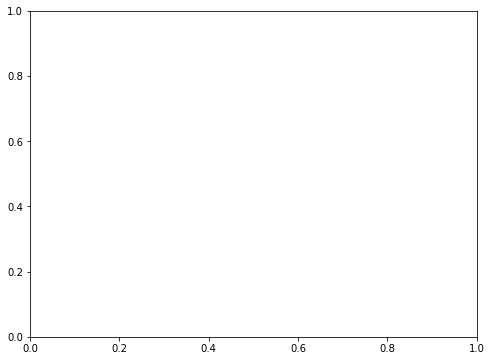

In [411]:
fig, ax = plt.subplots(figsize=figsize)
ax

In [407]:
# Split hotels with different star rating into separate data sets
df_2star = df.loc[(df.star_rating >= 2) & (df.star_rating <= 2.5)]
df_3star = df.loc[(df.star_rating >= 3) & (df.star_rating <= 3.5)]
df_4star = df.loc[(df.star_rating >= 4) & (df.star_rating <= 4.5)]
df_5star = df.loc[(df.star_rating > 4.5)]

Text(0, 0.5, 'price ($)')

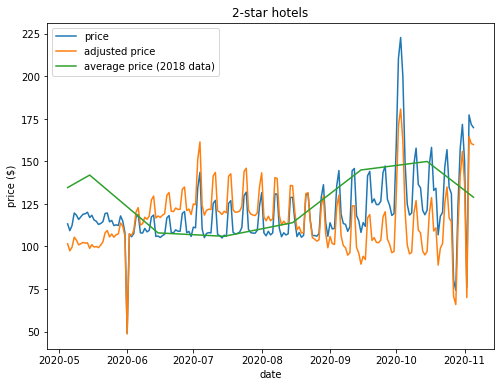

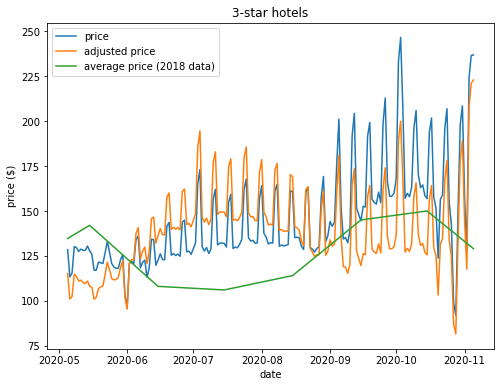

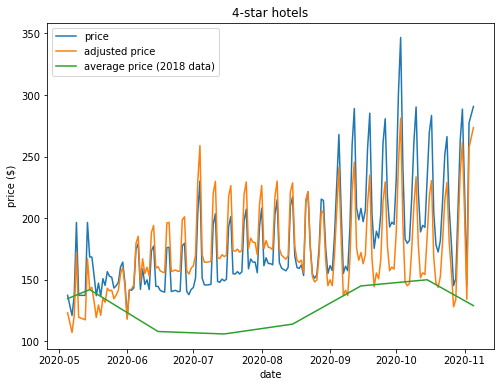

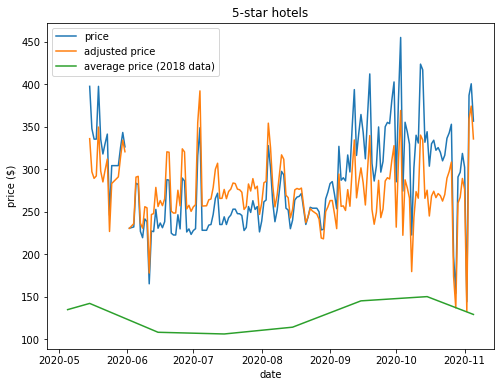

In [409]:
figsize = (8, 6)
date_groups = df_2star.groupby("checkin").mean().reset_index()

x = date_groups["checkin"]
y = date_groups["price"]

xind = index_prices["date"]
yind = index_prices["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("2-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

date_groups = df_3star.groupby("checkin").mean().reset_index()

x = date_groups["checkin"]
y = date_groups["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("3-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

date_groups = df_4star.groupby("checkin").mean().reset_index()

x = date_groups["checkin"]
y = date_groups["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("4-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

date_groups = df_5star.groupby("checkin").mean().reset_index()

x = date_groups["checkin"]
y = date_groups["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("5-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

These figures provide motivation for trying to predict when is the best time to book a hotel. As can be seen from the figures, booking a hotel 6 months in advance can be cheaper than booking last minute. This is contrary to what you would expect, since hotels generally lower prices last-minute on rooms that are have not yet been sold.

In [405]:
index_prices = pd.DataFrame({
    "month": ["2020-04-15", "2020-05-15", "2020-06-15", "2020-07-15", "2020-08-15", "2020-09-15", "2020-10-15", "2020-11-15"], 
    "price": [120, 142, 108, 106, 114, 145, 150, 119],
})

index_prices["month"] = pd.to_datetime(index_prices.month)

index_prices["price_norm_factor"] = 1/(index_prices["price"] / index_prices["price"][0])

idx = pd.date_range('2020-04-15', '2020-11-15')

index_prices = index_prices.set_index("month")

index_prices = index_prices.reindex(idx, fill_value=np.nan)

index_prices["price"] = index_prices.price.interpolate()
index_prices["price_norm_factor"] = index_prices.price_norm_factor.interpolate()

index_prices = index_prices.reset_index().rename(columns={"index": "date"})

index_prices = index_prices.loc[(index_prices.date >= "2020-05-05") & (index_prices.date <= "2020-11-05")].reset_index()

In [406]:
figsize = (8, 6)
date_groups = df_2star.groupby("Checkin").mean().reset_index()

x = date_groups["Checkin"]
y = date_groups["price"]

xind = index_prices["date"]
yind = index_prices["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("2-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

date_groups = df_3star.groupby("Checkin").mean().reset_index()

x = date_groups["Checkin"]
y = date_groups["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("3-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

date_groups = df_4star.groupby("Checkin").mean().reset_index()

x = date_groups["Checkin"]
y = date_groups["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("4-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

date_groups = df_5star.groupby("Checkin").mean().reset_index()

x = date_groups["Checkin"]
y = date_groups["price"]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, label="price")
ax.plot(x, y * index_prices.price_norm_factor, label="adjusted price")
ax.plot(xind, yind, label="average price (2018 data)")
plt.legend()
ax.set_title("5-star hotels")
ax.set_xlabel("date")
ax.set_ylabel("price ($)")

KeyError: 'Checkin'